In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
KRvideo = pd.read_csv("KR_youtube_trending_data.csv")

In [3]:
# 데이터 프레임 형태 파악 (상위 5개 행 x 전체 열 출력)
KRvideo.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [4]:
# 데이터 프레임의 전체 정보 요약
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127554 entries, 0 to 127553
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           127554 non-null  object
 1   title              127554 non-null  object
 2   publishedAt        127554 non-null  object
 3   channelId          127554 non-null  object
 4   channelTitle       127554 non-null  object
 5   categoryId         127554 non-null  int64 
 6   trending_date      127554 non-null  object
 7   tags               127554 non-null  object
 8   view_count         127554 non-null  int64 
 9   likes              127554 non-null  int64 
 10  dislikes           127554 non-null  int64 
 11  comment_count      127554 non-null  int64 
 12  thumbnail_link     127554 non-null  object
 13  comments_disabled  127554 non-null  bool  
 14  ratings_disabled   127554 non-null  bool  
 15  description        124129 non-null  object
dtypes: bool(2), int64(5)

In [5]:
df = KRvideo[["title", "channelTitle", "view_count"]]
df

,title,channelTitle,view_count
0,안녕하세요 보겸입니다,보겸 BK,5947503
1,부락토스의 계획 [총몇명 프리퀄],총몇명,963384
2,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885
3,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885
...,...,...,...
127549,미자 신혼집 최초공개!! (ft. 한잔 빠라삐리뽕~),미자네 주막,1288193
127550,"💡요즘 내가 주구장창 입고 쓰는 패션 아이템 | 요즘 산것들, 남자 패션 하울, 아...",오늘의 주우재,253216
127551,선생님 원래 이런 펌 맞는거죠..?,kiu기우쌤,617209
127552,드디어 처음으로 퍼스널컬러 진단 해봤습니다. 과연 예린아씨의 결과는?,예랑가랑,222710


In [6]:
df_sorted = df.sort_values(by='view_count', ascending=False)
df_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,282265069
...,...,...,...
47461,Earth Day 2021 Doodle,GoogleDoodles,0
25735,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
47684,Earth Day 2021 Doodle,GoogleDoodles,0
47909,Earth Day 2021 Doodle,GoogleDoodles,0


In [7]:
# 영상제목과 채널명이 둘 다 중복인 영상 제거
df_sorted_latest = df_sorted.drop_duplicates(['title','channelTitle'], keep='first')

# 상위 10개 영상 확인
df_sorted_latest.head()

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,262319276
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,194795844
79542,LISA - 'LALISA' M/V,BLACKPINK,192376395
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248


In [8]:
# groupby() : 특정 컬럼을 기준으로 그룹을 묶어서 평균, 합계를 낼 수 있음

# 채널별 조회수 합계 계산
df_channel_view_sum = df_sorted_latest.groupby(['channelTitle']).sum()

# 채널별 조회수 내림차순 정렬
df_channel_view = df_channel_view_sum.sort_values(by='view_count', ascending=False)

# 총 2253개의 채널 중 상위 20개 채널만 가져오기
df_channel_view_top20 = df_channel_view[:20]

# 데이터 출력
df_channel_view_top20

,view_count
channelTitle,
SMTOWN,1310307195
HYBE LABELS,1128434796
BLACKPINK,1067326881
BANGTANTV,982305349
JYP Entertainment,936375121
Big Hit Labels,730020411
starshipTV,248378852
Stone Music Entertainment,214913091
워크맨-Workman,211493797


In [9]:
df_channel_view_top20_index = df_channel_view_top20.reset_index()
df_channel_view_top20_index

,channelTitle,view_count
0,SMTOWN,1310307195
1,HYBE LABELS,1128434796
2,BLACKPINK,1067326881
3,BANGTANTV,982305349
4,JYP Entertainment,936375121
5,Big Hit Labels,730020411
6,starshipTV,248378852
7,Stone Music Entertainment,214913091
8,워크맨-Workman,211493797
9,officialpsy,205187670


<AxesSubplot:xlabel='view_count', ylabel='channelTitle'>

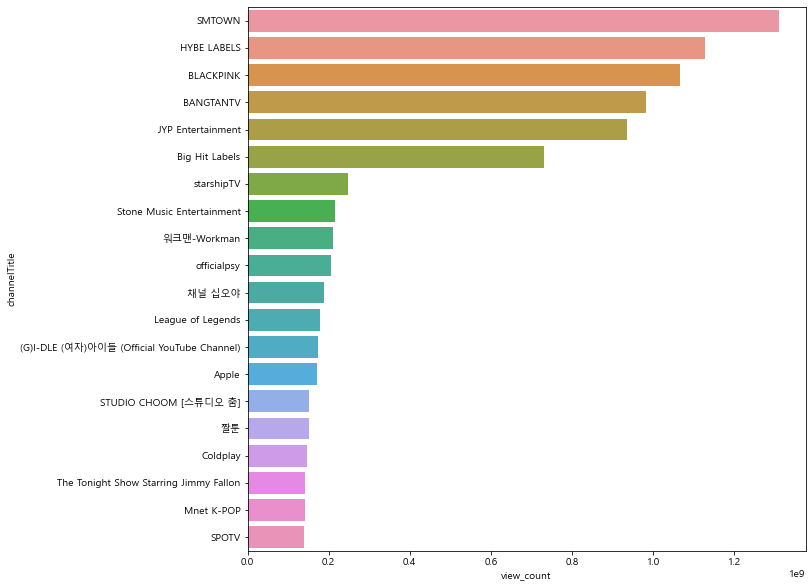

In [10]:
# 그래프 출력 시 이상한 에러들 무시
import warnings
warnings.filterwarnings("ignore")


# 그래프 그릴 때 한글 깨짐 방지 설정
import os

# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")


# 그래프 사이즈 설정
plt.figure(figsize=(10,10))


# seaborn 패키지로 수평막대 그래프 그리기
sns.barplot(x='view_count', y='channelTitle', data=df_channel_view_top20_index)